# **K-Means**


In [54]:
import pandas as pd
import numpy as np
from sklearn import tree
import time
from sklearn.preprocessing import LabelEncoder
import graphviz
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [55]:
df = pd.read_csv("diabetes_prediction_dataset.csv")
df


,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99995,Female,80.0,0,0,No Info,27.32,6.2,90,0
99996,Female,2.0,0,0,No Info,17.37,6.5,100,0
99997,Male,66.0,0,0,former,27.83,5.7,155,0
99998,Female,24.0,0,0,never,35.42,4.0,100,0


In [56]:
# Drop rows with missing values and reset the index
df = df.dropna().reset_index(drop=True)


In [57]:
# Use LabelEncoder to encode categorical variables to numeric values
le_sex = LabelEncoder()

In [58]:
df['gender'] = le_sex.fit_transform(df['gender'])
df['smoking_history'] = le_sex.fit_transform(df['smoking_history'])

df

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,0,80.0,0,1,4,25.19,6.6,140,0
1,0,54.0,0,0,0,27.32,6.6,80,0
2,1,28.0,0,0,4,27.32,5.7,158,0
3,0,36.0,0,0,1,23.45,5.0,155,0
4,1,76.0,1,1,1,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99995,0,80.0,0,0,0,27.32,6.2,90,0
99996,0,2.0,0,0,0,17.37,6.5,100,0
99997,1,66.0,0,0,3,27.83,5.7,155,0
99998,0,24.0,0,0,4,35.42,4.0,100,0


In [59]:
print(df.dtypes)

gender                   int64
age                    float64
hypertension             int64
heart_disease            int64
smoking_history          int64
bmi                    float64
HbA1c_level            float64
blood_glucose_level      int64
diabetes                 int64
dtype: object


In [60]:
# Dividir os dados em conjunto de treinamento e teste
X_train, X_test = train_test_split(df, test_size=0.2, random_state=42)
X_train

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
75220,1,73.0,0,0,3,24.77,3.5,80,0
48955,1,80.0,0,0,4,24.60,5.7,145,1
44966,0,38.0,0,0,2,24.33,4.0,158,0
13568,0,26.0,0,0,5,18.87,5.0,100,0
92727,0,61.0,1,0,1,22.11,4.5,85,0
...,...,...,...,...,...,...,...,...,...
6265,1,49.0,0,0,4,32.98,5.7,80,0
54886,0,15.0,0,0,4,28.10,5.0,159,0
76820,1,42.0,0,0,4,26.14,5.8,85,0
860,0,37.0,0,0,4,24.96,6.2,158,0


In [61]:
inputs = pd.DataFrame()
inputs['gender'] = le_sex.fit_transform(X_train['gender'])
inputs['age'] = X_train['age']
inputs['smoking_history'] = le_sex.fit_transform(X_train['smoking_history'])
inputs['blood_glucose_level'] = X_train['blood_glucose_level']
inputs['bmi'] = X_train['bmi']
inputs['HbA1c_level'] = X_train['HbA1c_level']
inputs['hypertension'] = X_train['hypertension']
inputs['heart_disease'] = X_train['heart_disease']
inputs = inputs.dropna()
inputs


,gender,age,smoking_history,blood_glucose_level,bmi,HbA1c_level,hypertension,heart_disease
0,1,80.0,3,140.0,25.19,6.6,0.0,1.0
1,1,54.0,4,80.0,27.32,6.6,0.0,0.0
2,0,28.0,2,158.0,27.32,5.7,0.0,0.0
3,0,36.0,5,155.0,23.45,5.0,0.0,0.0
4,0,76.0,1,155.0,20.14,4.8,1.0,1.0
...,...,...,...,...,...,...,...,...
79995,1,29.0,4,280.0,44.66,8.8,0.0,0.0
79996,0,12.0,4,140.0,17.62,4.5,0.0,0.0
79997,1,26.0,4,300.0,26.20,6.1,0.0,0.0
79998,0,47.0,4,300.0,26.33,6.6,1.0,0.0


In [62]:
inputs_test = pd.DataFrame()
inputs_test['gender'] = X_test['gender']
inputs_test['age'] = X_test['age']
inputs_test['smoking_history'] = X_test['smoking_history']
inputs_test['blood_glucose_level'] = X_test['blood_glucose_level']
inputs_test['bmi'] = X_test['bmi']
inputs_test['HbA1c_level'] = X_test['HbA1c_level']
inputs_test['hypertension'] = X_test['hypertension']
inputs_test['heart_disease'] = X_test['heart_disease']
inputs_test = inputs_test.dropna()

inputs_test

,gender,age,smoking_history,blood_glucose_level,bmi,HbA1c_level,hypertension,heart_disease
75721,0,13.0,0,126,20.82,5.8,0,0
80184,0,3.0,0,145,21.00,5.0,0,0
19864,1,63.0,3,200,25.32,3.5,0,0
76699,0,2.0,4,126,17.43,6.1,0,0
92991,0,33.0,5,200,40.08,6.2,0,0
...,...,...,...,...,...,...,...,...
32595,0,44.0,5,159,21.95,6.0,0,0
29313,1,61.0,3,90,41.98,3.5,1,0
37862,0,49.0,4,100,26.51,4.8,0,0
53421,1,73.0,0,100,27.32,6.6,0,1


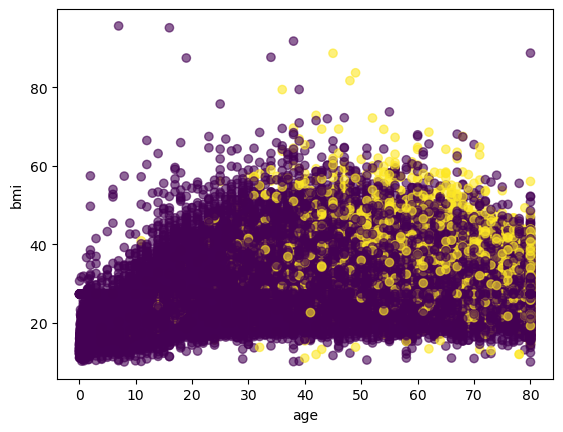

In [63]:
plt.scatter(df['age'], df['bmi'], c=df['diabetes'], alpha=0.6)

plt.xlabel('age')
plt.ylabel('bmi')
plt.show()

In [64]:
target = le_sex.fit_transform(X_test['diabetes'])
target

array([0, 0, 0, ..., 0, 0, 0])

In [65]:
target.shape

(20000,)

In [66]:
# Normalizando os dados
scaler = StandardScaler()

In [67]:
scaled_inputs = scaler.fit_transform(inputs)
scaled_inputs.shape

(63978, 8)

In [68]:
scaled_inputs_test = scaler.fit_transform(inputs_test)
scaled_inputs_test.shape

(20000, 8)

In [69]:
km = KMeans(n_clusters=2)
km.fit(scaled_inputs)
y_km = km.predict(scaled_inputs)
y_km

/home/labtec/anaconda3/envs/py/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([0, 1, 1, ..., 1, 0, 0], dtype=int32)

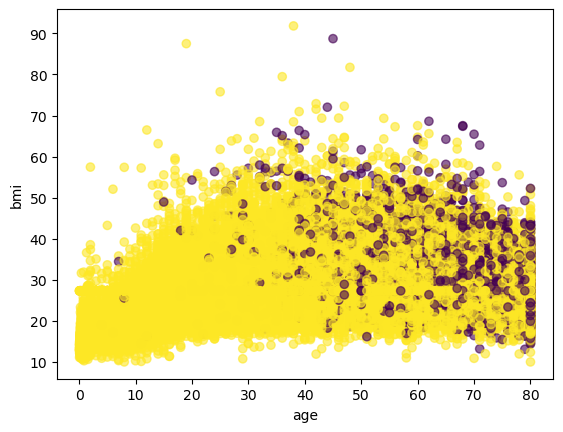

In [70]:
# Visualizando os clusters
plt.scatter(inputs['age'], inputs['bmi'], c=y_km, alpha=0.6)
plt.xlabel('age')
plt.ylabel('bmi')
plt.show()

In [71]:
target = le_sex.fit_transform(X_test['diabetes'])
target.size

20000

In [72]:
result = km.predict(scaled_inputs_test)
result.shape

(20000,)

In [73]:
# Calculando a diferença e a soma da diferença
(np.sum(result - target) * 100)/target.size

81.43